<a href="https://colab.research.google.com/github/johanhoffman/DD2363_VT24/blob/Widen00-Lab6/Lab6/Widen00_lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 6: Optimization and learning**
**Joel Widén**

# **Abstract**

This report is about the methods used in the fields of optimization and learning. These subjects will be investigated by completing assignments given in the course. This assignment is investigating the gradient descent method. The method is performing as expected.

#**About the code**

This is a report in the course DD2363 Methods in Scientific Computing. The author of this file is Joel Widén, joelwid@kth.se.

# **Set up environment**

In [78]:
# Load neccessary modules.
from google.colab import files

import time
import numpy as np

#try:
#    from dolfin import *; from mshr import *
#except ImportError as e:
#    !apt-get install -y -qq software-properties-common
#    !add-apt-repository -y ppa:fenics-packages/fenics
#    !apt-get update -qq
#    !apt install -y --no-install-recommends fenics
#    from dolfin import *; from mshr import *

#import dolfin.common.plotting as fenicsplot

from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes
from mpl_toolkits.mplot3d import Axes3D

# **Introduction**

Numbered algorithms, equations and chapter references used in this report is from the DD2363 course book Methods in Computational Science by Johan Hoffman if not stated otherwise.

Optimization is necessary in almost all fields of engineering and science. Used in economics, material science logistics etc, it is a useful tool for finding optimal solutions to different situations.

This report will go through some of the most common methods used in the fields of optimization and learning.

**Assignment 1:** Function: Gradient descent method in $R^n$

* *Input:* objective function $f(x)$
* *Output:* stationary point $x^*$ such that $|| \nabla (f)(x^*) || < TOL$
* *Test:* verify accuracy and convergence with respect to exact solution

# **Method**

**Assignment 1**

This assignment used algorithm 15.1. The line search used is the golden ratio search method. This was inspired by the one used in [this](https://en.wikipedia.org/wiki/Golden-section_search) Wikipedia page.


In [82]:
# Objective Function
def func(x):
  fx = x[0]**2 + x[1]**2 + 20
  return fx

# Step size function
def fs(f, x, s, Df):
  fs = f(x - s*Df)
  return fs

#Golden line search
def line_search(f, x, Df):
  gr = (np.sqrt(5) + 1)/2
  TOL = 1e-2
  s1 = -5
  s2 = 5
  while abs(s2 - s1) > TOL:
    s3 = s2 - (s2 - s1)/gr
    s4 = s1 + (s2 - s1)/gr
    if (fs(f, x, s3, Df) < fs(f, x, s4, Df)):
      s2 = s4
    else:
      s1 = s3
  return (s2 + s1)/2

#Calculate gradient using finite difference
def gradient(f, x):
  h = 1e-2
  Df = np.zeros_like(x)
  x_iter = np.zeros_like(x)
  for i in range(len(x)):
    x_iter[:] = x[:]
    x_iter[i] = x[i] + h
    Df[i] = (f(x_iter) - f(x))/h
  return Df

#Gradient descent method
def gradient_descent_method(f):
  x0 = np.array([20, -20], dtype="float")
  x = np.zeros_like(x0)
  x[:]=x0[:]
  Df = gradient(f, x)
  TOL = 1e-2
  x_vec = np.array([x], dtype="float")
  while np.linalg.norm(Df) > TOL:
    Df = gradient(f, x)
    alpha = line_search(f, x, Df)
    x[:] = x[:] - alpha*Df
    x_vec = np.append(x_vec, [x], axis=0)
  return x, x_vec

x, x_vec = gradient_descent_method(func)
sol = func(x)

#Generate convergence path
f_desc = np.zeros(len(x_vec))
x1_desc = np.zeros(len(x_vec))
x2_desc = np.zeros(len(x_vec))
exact_sol = np.array([0, 0])
error_vec = np.zeros(len(x_vec))
iteration = np.zeros(len(x_vec))
for i in range(len(x_vec)):
  iteration[i] = i
  f_desc[i] = func(x_vec[i])
  x1_desc[i] = x_vec[i][0]
  x2_desc[i] = x_vec[i][1]
  error_vec[i] = np.linalg.norm(x_vec[i] - exact_sol)

# **Results**

<ipython-input-80-877ec903ce95>:14: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 11


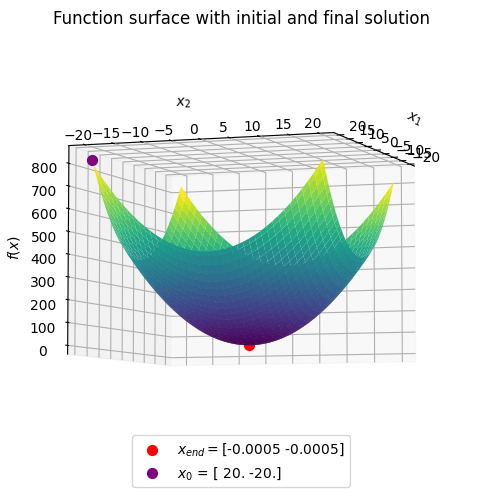

<Figure size 640x480 with 0 Axes>

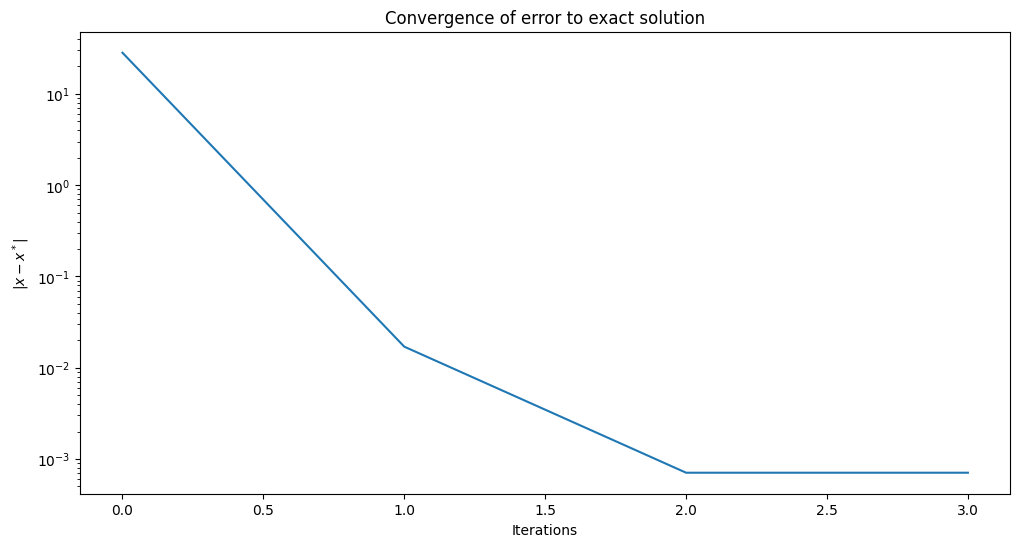

In [80]:
#Visualize function surface
x1 = x2 = np.arange(-20, 20, 0.5)
X, Y = np.meshgrid(x1, x2)
f1 = func([X, Y])
fig = plt.figure(1, figsize=(12, 6))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, f1, cmap='viridis')
ax.scatter(x[0], x[1], sol, color='red', s=50, marker ="o", label = "$x_{end} = $" + str(x))
ax.scatter(x1_desc[0], x2_desc[0], f_desc[0], color='purple', s=50, marker="o", label="$x_0$ = " + str(x_vec[0]))
ax.view_init(-5, 20)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$f(x)$")
ax.dist = 11
ax.legend(loc ="lower center")
ax.set_title("Function surface with initial and final solution")
plt.show()

#Error convergence
plt.figure(2)
plt.figure(figsize=(12, 6))
plt.semilogy(iteration, error_vec)
plt.xlabel("Iterations")
plt.ylabel("$|x - x^*|$")
plt.title("Convergence of error to exact solution")
plt.show()

# **Discussion**

As seen in the figures in the result section the gradient descent method converges to the exact solution, in this case the point $x^*=[0, 0]$. The gradient descent method is great for  local minimums but if the objective function would be more complex it cannot be a guaranteed global minimum, but just a critical point.